 ## BFS

In [1]:
import networkx as nx
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [3]:
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}
connection

{'CHANGCHUN': ['BEIJING'],
 'MULUMUQI': ['BEIJING'],
 'BEIJING': ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK'],
 'NEWYORK': ['BEIJING', 'SHANGHAI'],
 'SHANGHAI': ['NEWYORK', 'WUHAN'],
 'WUHAN': ['SHANGHAI', 'BEIJING', 'GUANGZHOU'],
 'GUANGZHOU': ['WUHAN', 'BANGKOK'],
 'SHENZHEN': ['WUHAN', 'BANGKOK'],
 'BANGKOK': ['SHENZHEN', 'GUANGZHOU']}

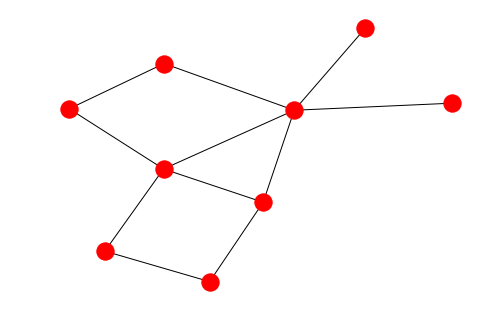

In [4]:
graph = nx.Graph(connection)
nx.draw(graph)

In [5]:
def nagivator_bfs(start, destination, graph):
    pathes = [start]
    seen = set()
    while pathes:
        froniter = pathes.pop(0)
        if froniter in seen: continue
        successors = graph[froniter]
        print("Standing on {}, looking forward {}".format(froniter, successors))
        pathes.extend(successors)
        seen.add(froniter)                

In [6]:
nagivator_bfs(CHANGCHUN, BANGKOK, connection)

Standing on CHANGCHUN, looking forward ['BEIJING']
Standing on BEIJING, looking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
Standing on MULUMUQI, looking forward ['BEIJING']
Standing on WUHAN, looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
Standing on SHENZHEN, looking forward ['WUHAN', 'BANGKOK']
Standing on NEWYORK, looking forward ['BEIJING', 'SHANGHAI']
Standing on SHANGHAI, looking forward ['NEWYORK', 'WUHAN']
Standing on GUANGZHOU, looking forward ['WUHAN', 'BANGKOK']
Standing on BANGKOK, looking forward ['SHENZHEN', 'GUANGZHOU']


In [7]:
def nagivator(start, destination, graph):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in seen: continue
        successors = graph[froniter]
        print("Standing on {}, looking forward {}".format(froniter, successors))
        for s in successors:
            if s is destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])
        pathes = sorted(pathes, key=len)
        seen.add(froniter)        

In [8]:
nagivator(CHANGCHUN, BANGKOK, connection)

Standing on CHANGCHUN, looking forward ['BEIJING']
Standing on BEIJING, looking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
Standing on MULUMUQI, looking forward ['BEIJING']
Standing on WUHAN, looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
Standing on SHENZHEN, looking forward ['WUHAN', 'BANGKOK']


['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [9]:
def draw_route(routes):
    print(' ✈ '.join(routes))

In [10]:
draw_route(nagivator(CHANGCHUN, BANGKOK, connection))

Standing on CHANGCHUN, looking forward ['BEIJING']
Standing on BEIJING, looking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
Standing on MULUMUQI, looking forward ['BEIJING']
Standing on WUHAN, looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
Standing on SHENZHEN, looking forward ['WUHAN', 'BANGKOK']
CHANGCHUN ✈ BEIJING ✈ SHENZHEN ✈ BANGKOK


----
## Sentence Generation

In [11]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [12]:
def parse_grammar(grammar_str, seq = '=>'):
    grammar = {}
    for line in grammar_str.strip().split('\n'):
        line = line.strip()
        if line is None: continue
        target, rules = line.split(seq)
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    return grammar

In [13]:
grammar = parse_grammar(grammar)
grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [14]:
def generate(grammar, target='sentence'):
    if target not in grammar: return target
    rules = random.choice(grammar[target])
    return ''.join(generate(grammar, target=r) for r in rules if r != 'null')

In [15]:
generate(grammar)

'一个桌子看见一个女人'